<a href="https://colab.research.google.com/github/mkbahk/DeepLearningwithKeras/blob/master/3_6_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1_%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표: 1970년 중반 보스턴 외곽지역의 범죄율, 지방세율 등의 데이타가 주어졌을 때 주택 가격의 중간 값을 예측

보스턴 주텍 데이터셋 로드하기

In [ ]:
from keras.datasets import boston_housing

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

데이타 정규화 작업

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std 

모델 정의하기: 훈련데이타가 적으면 overfitting될 확률이 높음. 이런 경우 보다 작은 모델을 사용하는 것이 overfit을 방지하는 방법임

In [ ]:
from keras import models, layers

In [ ]:
def build_model(): #동일한 모델을 여러번 생성하기 때문에 함수를 만들어서 사용합니다.
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model
# end of def

In [ ]:
import numpy as np

k = 4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_mae_histories = []

for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] #검증 데이타 준비: k번째 분할
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0) #훈련 데이터 준비: 다른 분할 전체
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model() #케라스 모델 구성(컴파일 포함) 
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_ecpochs, batch_size=1, verbose=0) #모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다.)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #검증 세트로 모델 평가
  
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)
#end of for

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
all_scores

[2.2532341480255127, 2.1806814670562744, 3.00776743888855, 2.456148862838745]

In [ ]:
np.mean(all_scores)

2.4744579792022705

K-겹 검증 점수 평균을 기록하기

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

검증 점수 그래프

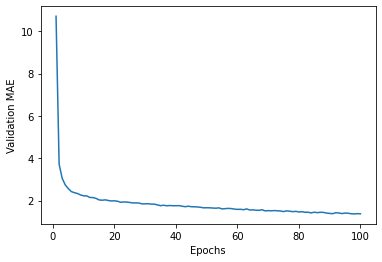

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

처음 10개의 데이터 포인트를 제외한 검증 점수 그리기

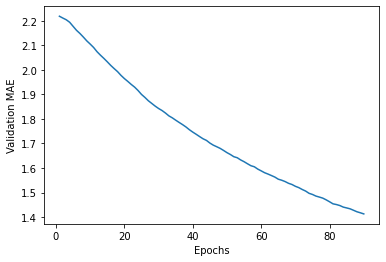

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
    #end of if
  #end of for
  return smoothed_points
#end of def

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

모델 평가하기

In [ ]:
test_mse_score, test_mae_score =  model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 18.7504 - mae: 2.7989
